In [166]:
import os
import torch
import random
import torch.nn as nn

f=open("./all/48p9.rle", "r")
lines = f.readlines()
encoded = ''
j = 0
for j in range(len(lines)):
    if lines[j][0] != '#':
        break
for i in range(j+1, len(lines)):
    encoded += lines[i].split('\n')[0].split('!')[0]
encoded += '$'
print(encoded)

a = lines[j].split(',')
x = int(a[0][4:])
y = int(a[1][5:])
print(x,y)

board = torch.zeros(x*y)

def decoder(data):
    decode = ''
    count = ''
    pos = 0
    
    for char in data:
        if char.isdigit():
            count += char
        elif char.isalpha():
            if count == '':
                num = 1
            else:
                num = int(count)
            decode += char * num
            count = ''
            pos+= num
            
        else:
            if count == '':
                num = 1
            else:
                num = int(count)
            decode += 'b' * (x - pos)
            decode += 'b' * x * (num-1)
            pos = 0
            count = ''
            
    return decode
decoded = decoder(encoded)
print(decoded)

for i in range(x*y):
    if decoded[i] == 'o':
        board[i] = 1


board = board.reshape(y,x)

hor = 50 - x
ver = 50 - y
left = int(random.random() * hor)
top = int(random.random() * ver)
    
pad = nn.ConstantPad2d((left, hor -  left, top, ver-top), 0)
board = pad(board)


b2o$obo$3o$10b2o$b2o7bo$4o4bobo$o3bo3b2o$5bo$2bo2bo$5bo$o3bo3b2o$4o4bobo$b2o7bo$10b2o$3o$obo$b2o$
12 17
boobbbbbbbbbobobbbbbbbbbooobbbbbbbbbbbbbbbbbbbooboobbbbbbboboooobbbbobobobbbobbboobbbbbbbobbbbbbbbobbobbbbbbbbbbbobbbbbbobbbobbboobboooobbbbobobboobbbbbbbobbbbbbbbbbbooooobbbbbbbbbobobbbbbbbbbboobbbbbbbbb


In [167]:
print(board.shape)

torch.Size([50, 50])


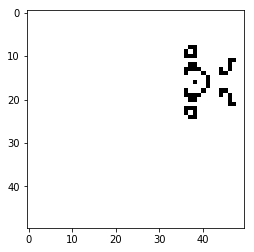

(50, 50)


In [168]:
import matplotlib.pyplot as plt
np_board = board.numpy().reshape(50,50)
plt.imshow(np_board, cmap='Greys',  interpolation='nearest')
plt.show()
print(np_board.shape)

In [162]:
np_board

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [145]:
y

36